In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
from sklearn.preprocessing import OneHotEncoder


savePlots = False

In [18]:
df = pd.read_csv('network_backup_dataset.csv', ',')

In [19]:
#Columns in the dataframe: 
list(df)

['Week #',
 'Day of Week',
 'Backup Start Time - Hour of Day',
 'Work-Flow-ID',
 'File Name',
 'Size of Backup (GB)',
 'Backup Time (hour)']

In [20]:
df2 = df.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22,
                                'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

X = df2[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']].as_matrix()
y = df2['Size of Backup (GB)'].as_matrix()


### Question 2a: Linear Regression Model - ii)  Without Data Preprocessing:

In [21]:
# regression without cross validation for the coefficients
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
test_shape = y_test.shape[0]
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
# print ("Coefficients:", linear_regression.coef_)
# print ("Intercept:", linear_regression.intercept_)
yTest_predict = linear_regression.predict(X_test)
yTrain_predict = linear_regression.predict(X_train)

print ("Train RMSE without cross validation:", np.sqrt(metrics.mean_squared_error(y_train, yTrain_predict)), "\n")
print ("Test RMSE without cross validation:", np.sqrt(metrics.mean_squared_error(y_test, yTest_predict)), "\n")


Train RMSE without cross validation: 0.10326502125157985 

Test RMSE without cross validation: 0.10650386699819153 



In [22]:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []
linear_regression = linear_model.LinearRegression()

for train, test in k_fold.split(X, y):
      
    linear_regression.fit(X[train], y[train])
    yTest_predict = linear_regression.predict(X[test])
    yTrain_predict = linear_regression.predict(X[train])
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")


Training RMSE with Kfold cross Validation =  0.10358539364277801 

Testing RMSE with Kfold cross Validation =  0.1036758476759903 



In [23]:
# 10 fold cross validation using cross_val
linear_regression = linear_model.LinearRegression()
predicted = cross_val_predict(linear_regression, X, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")


RMSE with cross validation (computed by cross_val_predict): 0.10367585884664492




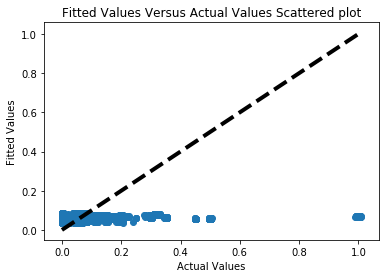

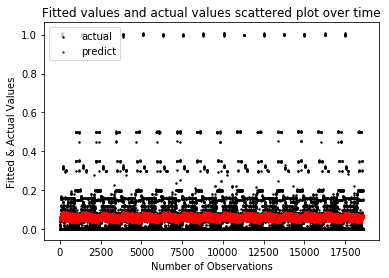

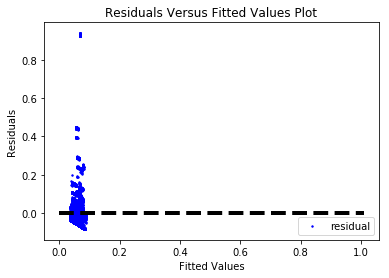

In [24]:
# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2ai.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2ai.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted,y-predicted,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2ai.png')
plt.show()


### Question 2a: Linear Regression Model - ii)  With Data Preprocessing:

In [25]:
XStandard = StandardScaler().fit_transform(X)
yStandard = StandardScaler().fit_transform(y[:, None])

/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [26]:
#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []
linear_regression = linear_model.LinearRegression()
for train, test in k_fold.split(XStandard, y):
    
    linear_regression.fit(XStandard[train], y[train])
    yTest_predict = linear_regression.predict(XStandard[test])
    yTrain_predict = linear_regression.predict(XStandard[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

Training RMSE with Kfold cross Validation =  0.10358539364277801 

Testing RMSE with Kfold cross Validation =  0.1036758476759903 



In [27]:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []
linear_regression = linear_model.LinearRegression()
for train, test in k_fold.split(XStandard, yStandard):
    
    linear_regression.fit(XStandard[train], yStandard[train])
    yTest_predict = linear_regression.predict(XStandard[test])
    yTrain_predict = linear_regression.predict(XStandard[train])
    
    trainMSE.append(metrics.mean_squared_error(yStandard[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(yStandard[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

Training RMSE with Kfold cross Validation =  0.9942003282604069 

Testing RMSE with Kfold cross Validation =  0.9950684953479623 



In [28]:
# 10 fold cross validation using cross_val
linear_regression = linear_model.LinearRegression()
predicted = cross_val_predict(linear_regression, XStandard, yStandard, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")


RMSE with cross validation (computed by cross_val_predict): 0.15505792221621023




In [29]:
# 10 fold cross validation using cross_val
linear_regression = linear_model.LinearRegression()
predictedStandard = cross_val_predict(linear_regression, XStandard, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")

RMSE with cross validation (computed by cross_val_predict): 0.15505792221621023




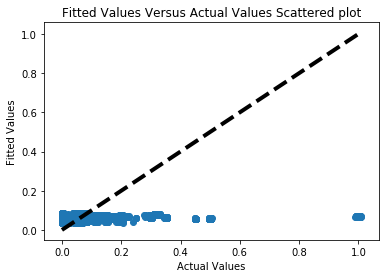

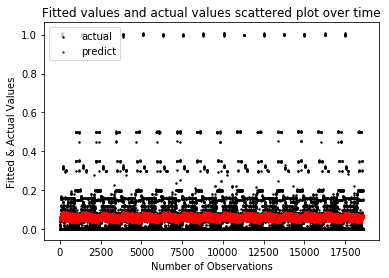

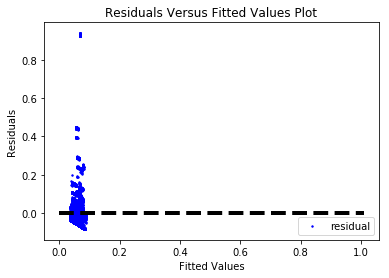

In [30]:
# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predictedStandard)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predictedStandard, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predictedStandard,y-predictedStandard,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aii.png')
plt.show()


### Question 2a: Linear Regression Model - iii) With Feature Selection:

In [31]:
f_regression_BestFeatures = SelectKBest(f_regression, k=3)
mutual_Regression_BestFeatures = SelectKBest(mutual_info_regression, k=3)
allFeatures = list(df2)

Xfeatures_f_regression = f_regression_BestFeatures.fit_transform(X, y)
Xfeatures_mutual_regression = mutual_Regression_BestFeatures.fit_transform(X, y)


importantFeatures_f_regression = [allFeatures[i] for i in f_regression_BestFeatures.get_support(indices=True)]
importantFeatures_mutual_regression = [allFeatures[i] for i in mutual_Regression_BestFeatures.get_support(indices=True)]
print("Important Features Using f_regression are: ", importantFeatures_f_regression)
print("Important Features Using mutual_regression are: ", importantFeatures_mutual_regression)

/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Important Features Using f_regression are:  ['Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID']
Important Features Using mutual_regression are:  ['Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']


In [32]:
#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(Xfeatures_f_regression, y):
    
    linear_regression.fit(Xfeatures_f_regression[train], y[train])
    yTest_predict = linear_regression.predict(Xfeatures_f_regression[test])
    yTrain_predict = linear_regression.predict(Xfeatures_f_regression[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(ydata[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

Training RMSE with Kfold cross Validation =  0.10358568214188695 

Testing RMSE with Kfold cross Validation =  0.10367066183103706 



In [33]:
# 10 fold cross validation using cross_val
predictedFeatures_f_regression = cross_val_predict(linear_regression, Xfeatures_f_regression, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predictedFeatures_f_regression)))
print ("\n")

RMSE with cross validation (computed by cross_val_predict): 0.10367067328174254




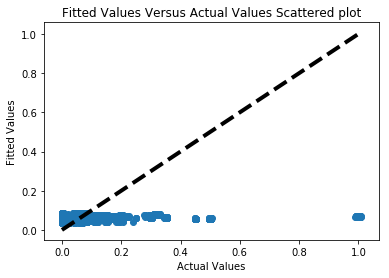

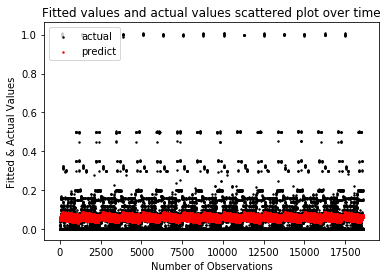

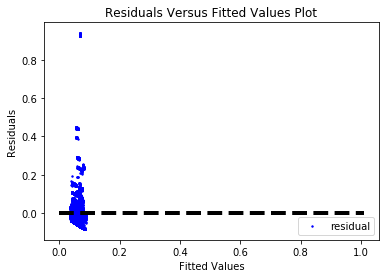

In [34]:
# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predictedFeatures_f_regression)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aiii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predictedFeatures_f_regression, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aiii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predictedFeatures_f_regression,y-predictedFeatures_f_regression,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aiii.png')
plt.show()


Training RMSE with Kfold cross Validation =  0.10369452819355413 

Testing RMSE with Kfold cross Validation =  0.10377229307066825 

RMSE with cross validation (computed by cross_val_predict): 0.10377230385987919




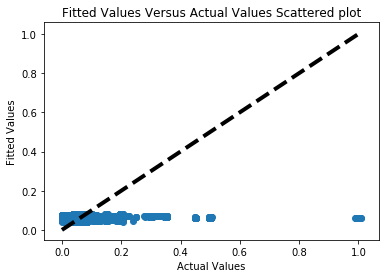

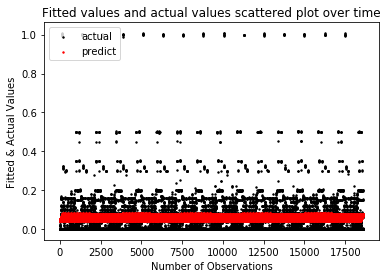

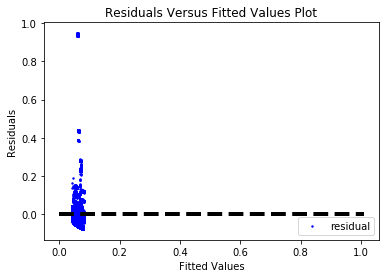

In [124]:
#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(Xfeatures_mutual_regression, y):
    
    linear_regression.fit(Xfeatures_mutual_regression[train], y[train])
    yTest_predict = linear_regression.predict(Xfeatures_mutual_regression[test])
    yTrain_predict = linear_regression.predict(Xfeatures_mutual_regression[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

# 10 fold cross validation using cross_val
predictedFeatures_mutual_regression = cross_val_predict(linear_regression, Xfeatures_mutual_regression, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predictedFeatures_mutual_regression)))
print ("\n")


# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predictedFeatures_mutual_regression)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aiii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predictedFeatures_mutual_regression, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aiii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predictedFeatures_mutual_regression,y-predictedFeatures_mutual_regression,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aiii.png')
plt.show()


### Question 2a: Linear Regression Model - iv) With One hot encoding:

In [96]:
Xpanda = df2.iloc[:, [0, 1, 2, 3,4]]
ypanda = df2.iloc[:, 5]

def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    #print (cols)
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = df.drop(each, axis=1)
        df = pd.concat([df, dummies], axis=1)
    return df


In [97]:
import itertools
lst = list(itertools.product([0, 1], repeat=5))
#print(lst)
linear_regression = linear_model.LinearRegression()
testRMSEarray = []
trainRMSEarray = []
k_fold = KFold(n_splits=10)

for i in range(len(lst)):
    b = [i for i, e in enumerate(lst[i]) if e != 0]
    #print(b)
    if not b:
        trainMSE = []
        testMSE = []
        for train, test in k_fold.split(X, y):
            
            linear_regression = linear_model.LinearRegression()
            linear_regression.fit(X[train], y[train])
            
            yTest_predict = linear_regression.predict(X[test])
            yTrain_predict = linear_regression.predict(X[train])
            
            trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
            testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

        print( "Coefficients:", linear_regression.coef_)
        print("Training RMSE is: ", np.sqrt(np.mean(trainMSE)))
        print("Testing RMSE is: ", np.sqrt(np.mean(testMSE)))
        trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
        testRMSEarray.append(np.sqrt(np.mean(testMSE)))

    else:
        
        trainMSE = []
        testMSE = []
        onehotColumn = []
        for j in b:
            onehotColumn.append(list(Xpanda)[j])
            
        xOneHot = one_hot(Xpanda,onehotColumn)
        xOneHot = xOneHot.as_matrix()
        for train, test in k_fold.split(xOneHot, y):

            linear_regression = linear_model.LinearRegression()
            linear_regression.fit(xOneHot[train], y[train])
            yTest_predict = linear_regression.predict(xOneHot[test])
            yTrain_predict = linear_regression.predict(xOneHot[train])

            trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
            testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

        print ("Coefficients:", linear_regression.coef_)
        print("Training RMSE is: ", np.sqrt(np.mean(trainMSE)))
        print("Testing RMSE is: ", np.sqrt(np.mean(testMSE)))
        trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
        testRMSEarray.append(np.sqrt(np.mean(testMSE)))
            

Coefficients: [-4.47872791e-05 -2.48582064e-03  1.39000106e-03  2.04745046e-03
 -3.05163680e-07]
Training RMSE is:  0.10358539364277801
Testing RMSE is:  0.1036758476759903
Coefficients: [-4.47389836e-05 -2.54726293e-03  1.40357962e-03 -3.11246827e+08
 -1.09010795e+09 -1.09010795e+09 -1.09010795e+09 -1.09010795e+09
 -1.09010795e+09 -1.09010795e+09 -7.78861119e+08 -7.78861119e+08
 -7.78861119e+08 -7.78861119e+08 -7.78861119e+08 -7.78861119e+08
 -4.67614292e+08 -4.67614292e+08 -4.67614292e+08 -4.67614292e+08
 -4.67614292e+08 -4.67614292e+08 -1.56367465e+08 -1.56367465e+08
 -1.56367465e+08 -1.56367465e+08 -1.56367465e+08 -1.56367465e+08
  1.54879362e+08  1.54879362e+08  1.54879362e+08  1.54879362e+08
  1.54879362e+08  1.54879362e+08]
Training RMSE is:  0.09133723921472371
Testing RMSE is:  0.09149847088706929
Coefficients: [-4.46855738e-05 -2.54728446e-03  1.40357519e-03  4.07205083e-06
  3.94158679e-02 -1.23467638e-02 -4.09352108e-02 -5.72109785e-02
  7.10770851e-02]
Training RMSE is:  0

Coefficients: [-2.61050191e-03  1.43657199e-03  8.34346209e+09  3.45445352e+10
  3.45445352e+10  3.45445352e+10  3.45445352e+10  3.45445352e+10
  3.45445352e+10  3.45445352e+10  3.45445352e+10  3.45445352e+10
  3.45445352e+10  3.45445352e+10  3.45445352e+10  3.45445352e+10
  3.45445352e+10  0.00000000e+00  1.12843573e+10  1.12843573e+10
  1.12843573e+10  1.12843573e+10  1.12843573e+10  1.12843573e+10
  2.94089518e+09  2.94089518e+09  2.94089518e+09  2.94089518e+09
  2.94089518e+09  2.94089518e+09 -5.40256691e+09 -5.40256691e+09
 -5.40256691e+09 -5.40256691e+09 -5.40256691e+09 -5.40256691e+09
 -1.37460290e+10 -1.37460290e+10 -1.37460290e+10 -1.37460290e+10
 -1.37460290e+10 -1.37460290e+10 -2.20894911e+10 -2.20894911e+10
 -2.20894911e+10 -2.20894911e+10 -2.20894911e+10 -2.20894911e+10]
Training RMSE is:  0.09144737830869654
Testing RMSE is:  18426087971.65891
Coefficients: [-2.61253372e-03  1.40087330e-03  4.08863393e-06 -5.07735418e-04
  2.76682071e-04  6.56217283e-04 -4.53853181e-05  6

Coefficients: [-2.61959567e+10  6.29530015e+10  6.29530015e+10  6.29530015e+10
  6.29530015e+10  6.29530015e+10  6.29530015e+10  6.29530015e+10
  6.29530015e+10  6.29530015e+10  6.29530015e+10  6.29530015e+10
  6.29530015e+10  6.29530015e+10  6.29530015e+10 -2.20139031e+10
  3.79397633e+10  3.79397633e+10  3.79397633e+10  3.79397633e+10
  3.79397633e+10  3.79397633e+10  3.79397633e+10 -1.84344634e+10
 -1.84344634e+10 -1.84344634e+10 -1.84344634e+10 -1.84344634e+10
 -1.84344634e+10 -4.75560384e+10 -4.75560384e+10 -4.75560384e+10
 -4.75560384e+10 -4.75560384e+10 -4.75560384e+10 -2.13600817e+10
 -2.13600817e+10 -2.13600817e+10 -2.13600817e+10 -2.13600817e+10
 -2.13600817e+10  4.83587499e+09  4.83587499e+09  4.83587499e+09
  4.83587499e+09  4.83587499e+09  4.83587499e+09  3.10318317e+10
  3.10318317e+10  3.10318317e+10  3.10318317e+10  3.10318317e+10
  3.10318317e+10  5.72277884e+10  5.72277884e+10  5.72277884e+10
  5.72277884e+10  5.72277884e+10  5.72277884e+10]
Training RMSE is:  0.08833

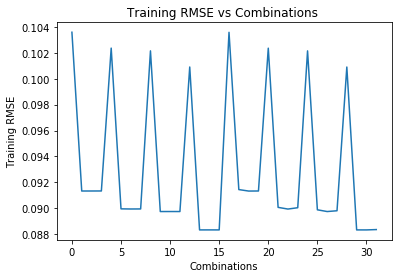

In [91]:

# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Training RMSE vs Combinations ')
plt.plot(np.arange(len(lst)),trainRMSEarray)
plt.xlabel('Combinations')
plt.ylabel('Training RMSE')
if savePlots:
    plt.savefig('onehotTrainingRMSE2aiv.png')
plt.show()

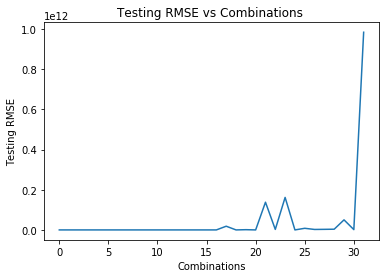

In [92]:

# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Testing RMSE vs Combinations ')
plt.plot(np.arange(len(lst)),testRMSEarray)
plt.xlabel('Combinations')
plt.ylabel('Testing RMSE')
if savePlots:
    plt.savefig('onehotTestingRMSE2aiv.png')
plt.show()

Training RMSE with Kfold cross Validation =  0.08833744861880978 

Testing RMSE with Kfold cross Validation =  0.08850426070459978 

RMSE with cross validation (computed by cross_val_predict): 0.08850427392003928




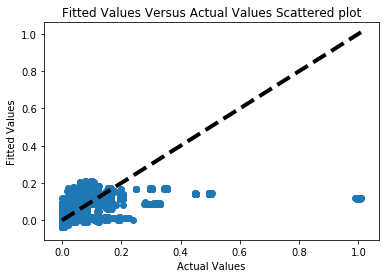

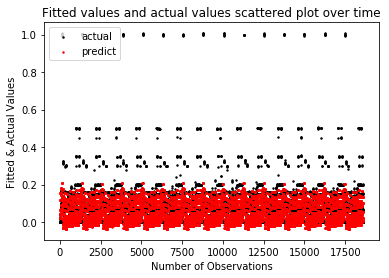

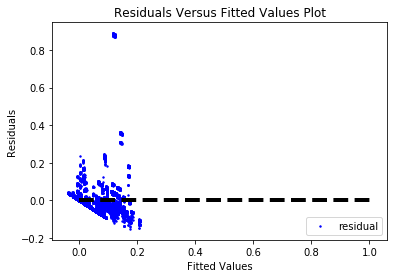

In [126]:
#Best Model

bestModel = (1,2,3)
bestOnehotColumn=[]
for j in bestModel:
    bestOnehotColumn.append(list(Xpanda)[j])

xBestOneHot = one_hot(Xpanda,bestOnehotColumn)
xBestOneHot = xBestOneHot.as_matrix()

#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(xBestOneHot, y):
    
    linear_regression.fit(xBestOneHot[train], y[train])
    yTest_predict = linear_regression.predict(xBestOneHot[test])
    yTrain_predict = linear_regression.predict(xBestOneHot[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

# 10 fold cross validation using cross_val
predicted = cross_val_predict(linear_regression, xBestOneHot, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")


# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aiii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aiii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted,y-predicted,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aiii.png')
plt.show()



### Question 2a: Linear Regression Model - v) Controlling ill-conditioning and over-fiting:

#### Ridge Regularization

In [106]:
alphas = [0.00005, 0.005, 0.5, 5, 50, 500]
for alphaVal in alphas:
    print("-"*40)
    print("Alpha =  ", alphaVal)
    ridge_regression = linear_model.Ridge (alpha = alphaVal)
    trainRMSEarray = []
    testRMSEarray = []
    for i in range(len(lst)):
        b = [i for i, e in enumerate(lst[i]) if e != 0]
        #print(b)
        if not b:
            trainMSE = []
            testMSE = []
            for train, test in k_fold.split(X, y):

                ridge_regression.fit(X[train], y[train])

                yTest_predict = ridge_regression.predict(X[test])
                yTrain_predict = ridge_regression.predict(X[train])

                trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

            
            trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
            testRMSEarray.append(np.sqrt(np.mean(testMSE)))

        else:

            trainMSE = []
            testMSE = []
            onehotColumn = []
            for j in b:
                onehotColumn.append(list(Xpanda)[j])

            xOneHot = one_hot(Xpanda,onehotColumn)
            xOneHot = xOneHot.as_matrix()
            for train, test in k_fold.split(xOneHot, y):

                ridge_regression.fit(xOneHot[train], y[train])
                yTest_predict = ridge_regression.predict(xOneHot[test])
                yTrain_predict = ridge_regression.predict(xOneHot[train])

                trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

         
            trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
            testRMSEarray.append(np.sqrt(np.mean(testMSE)))
    #print ("Training RMSE for all 32 models: \n", trainRMSEarray, "\n")
    #print ("Testing RMSE for all 32 models: \n", testRMSEarray, "\n")
    
    print("Lowest Test RMSE is model # ",testRMSEarray[np.argsort(testRMSEarray)[0]] )
    print("Model with Lowest Test RMSE is", lst[np.argsort(testRMSEarray)[0]])


----------------------------------------
Alpha =   5e-05
Lowest Test RMSE is model #  0.08850426070225774
Model with Lowest Test RMSE is (0, 1, 1, 1, 0)
----------------------------------------
Alpha =   0.005
Lowest Test RMSE is model #  0.08850426047043795
Model with Lowest Test RMSE is (0, 1, 1, 1, 0)
----------------------------------------
Alpha =   0.5
Lowest Test RMSE is model #  0.08850423780345543
Model with Lowest Test RMSE is (0, 1, 1, 1, 0)
----------------------------------------
Alpha =   5
Lowest Test RMSE is model #  0.08850407798481687
Model with Lowest Test RMSE is (0, 1, 1, 1, 0)
----------------------------------------
Alpha =   50
Lowest Test RMSE is model #  0.08850657688374067
Model with Lowest Test RMSE is (0, 1, 1, 1, 1)
----------------------------------------
Alpha =   500
Lowest Test RMSE is model #  0.0887545959595458
Model with Lowest Test RMSE is (0, 1, 1, 1, 1)


In [121]:
# worst Test error is when we one hot encode all columns. 
# Let us apply ridge regression to this. 
bestModel = (1,2,3)
bestOnehotColumn=[]
for j in bestModel:
    bestOnehotColumn.append(list(Xpanda)[j])

xBestOneHot = one_hot(Xpanda,bestOnehotColumn)

linear_regression = linear_model.LinearRegression()
linear_regression.fit(xBestOneHot, y)
print ("Coefficients (Linear Regression) : \n", linear_regression.coef_, "\n")

ridge_regression = linear_model.Ridge (alpha = 0.005)
ridge_regression.fit(xBestOneHot,y)
print ("Coefficients (Ridge Regression) : \n", ridge_regression.coef_, "\n")


Coefficients (Linear Regression) : 
 [ 1.12119624e-05  4.60288590e-05  3.93117223e-02 -1.28639980e-02
 -2.02670148e-02 -5.24819462e-03 -5.70653152e-03  3.27725218e-03
  1.49676439e-03 -2.02050771e-02 -2.10615456e-02  7.79150858e-03
  3.34547589e-02 -1.98706459e-03  2.00741982e-03  3.87764669e-02
 -1.37895445e-02 -4.02017340e-02 -5.71812706e-02  7.23960823e-02] 

Coefficients (Ridge Regression) : 
 [ 1.12119703e-05  4.60420470e-05  3.93116476e-02 -1.28639724e-02
 -2.02669773e-02 -5.24818499e-03 -5.70652017e-03  3.27724601e-03
  1.49676152e-03 -2.02050451e-02 -2.10615099e-02  7.79149612e-03
  3.34547057e-02 -1.98706385e-03  2.00741730e-03  3.87765729e-02
 -1.37894469e-02 -4.02016805e-02 -5.71812744e-02  7.23958279e-02] 



Training RMSE with Kfold cross Validation =  0.08833744861885706 

Testing RMSE with Kfold cross Validation =  0.08850426047043795 

RMSE with cross validation (computed by cross_val_predict): 0.08850427368588674




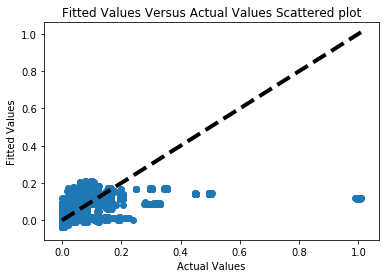

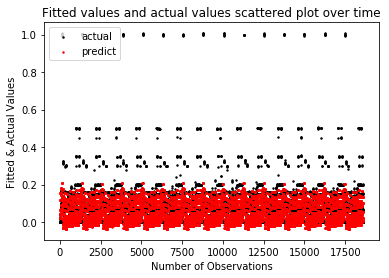

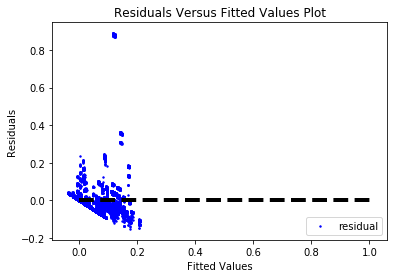

In [127]:
#Best Model
ridge_regression = linear_model.Ridge (alpha = 0.005)
bestModel = (1,2,3)
bestOnehotColumn=[]
for j in bestModel:
    bestOnehotColumn.append(list(Xpanda)[j])

xBestOneHot = one_hot(Xpanda,bestOnehotColumn)
xBestOneHot = xBestOneHot.as_matrix()

#K-fold cross Validation:
k_fold = KFold(n_splits=10)
testMSE = []
trainMSE = []

for train, test in k_fold.split(xBestOneHot, y):
    
    ridge_regression.fit(xBestOneHot[train], y[train])
    yTest_predict = ridge_regression.predict(xBestOneHot[test])
    yTrain_predict = ridge_regression.predict(xBestOneHot[train])
    
    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


trainRMSE = np.sqrt(np.mean(trainMSE))
testRMSE = np.sqrt(np.mean(testMSE))

print ("Training RMSE with Kfold cross Validation = ", trainRMSE, "\n")
print ("Testing RMSE with Kfold cross Validation = ", testRMSE, "\n")

# 10 fold cross validation using cross_val
predicted = cross_val_predict(ridge_regression, xBestOneHot, y, cv=10)
print ("RMSE with cross validation (computed by cross_val_predict):", np.sqrt(metrics.mean_squared_error(y, predicted)))
print ("\n")


# plot fitted values vs actual values scattered plot
plt.figure()
plt.title('Fitted Values Versus Actual Values Scattered plot')
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
if savePlots:
    plt.savefig('fittedVsActual2aiii.png')
plt.show()


# Plot Fitted values and actual values scattered plot over time
plt.title('Fitted values and actual values scattered plot over time')
plt.scatter(np.arange(y.shape[0]), y, color='black', label='actual', s=2)
plt.scatter(np.arange(y.shape[0]), predicted, color='red', label='predict', s=2)
plt.xlabel('Number of Observations')
plt.ylabel('Fitted & Actual Values')
plt.legend(loc='upper left')
if savePlots:
    plt.savefig('fittedVsActualOverTime2aiii.png')
plt.show()

# plot residuals versus fitted values plot
plt.title('Residuals Versus Fitted Values Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.scatter(predicted,y-predicted,  color='blue', lw=1, label='residual', s=2)
plt.plot([y.min(), y.max()], [0, 0], 'k--', lw=4)
plt.legend(loc='lower right')
if savePlots:
    plt.savefig('residualsVsFitted2aiii.png')
plt.show()



#### Lasso Regularization

In [115]:


alphas = [0.00005, 0.005, 0.5, 5, 50, 500]
for alphaVal in alphas:
    print("-"*40)
    print("Alpha =  ", alphaVal)
    lasso_regression = linear_model.Lasso(alpha = alphaVal)
    trainRMSEarray = []
    testRMSEarray = []
    for i in range(len(lst)):
        b = [i for i, e in enumerate(lst[i]) if e != 0]
        #print(b)
        if not b:
            trainMSE = []
            testMSE = []
            for train, test in k_fold.split(X, y):

                lasso_regression.fit(X[train], y[train])

                yTest_predict = lasso_regression.predict(X[test])
                yTrain_predict = lasso_regression.predict(X[train])

                trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

            
            trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
            testRMSEarray.append(np.sqrt(np.mean(testMSE)))

        else:

            trainMSE = []
            testMSE = []
            onehotColumn = []
            for j in b:
                onehotColumn.append(list(Xpanda)[j])

            xOneHot = one_hot(Xpanda,onehotColumn)
            xOneHot = xOneHot.as_matrix()
            for train, test in k_fold.split(xOneHot, y):

                lasso_regression.fit(xOneHot[train], y[train])
                yTest_predict = lasso_regression.predict(xOneHot[test])
                yTrain_predict = lasso_regression.predict(xOneHot[train])

                trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))

         
            trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
            testRMSEarray.append(np.sqrt(np.mean(testMSE)))
    #print ("Training RMSE for all 32 models: \n", trainRMSEarray, "\n")
    #print ("Testing RMSE for all 32 models: \n", testRMSEarray, "\n")
    
    print("Lowest Test RMSE is model # ",testRMSEarray[np.argsort(testRMSEarray)[0]] )
    print("Model with Lowest Test RMSE is", lst[np.argsort(testRMSEarray)[0]])



----------------------------------------
Alpha =   5e-05
Lowest Test RMSE is model #  0.08850536270340278
Model with Lowest Test RMSE is (0, 1, 1, 1, 1)
----------------------------------------
Alpha =   0.005
Lowest Test RMSE is model #  0.09377283189468173
Model with Lowest Test RMSE is (1, 1, 0, 1, 0)
----------------------------------------
Alpha =   0.5
Lowest Test RMSE is model #  0.10419023788574096
Model with Lowest Test RMSE is (0, 0, 0, 0, 0)
----------------------------------------
Alpha =   5
Lowest Test RMSE is model #  0.10419023788574096
Model with Lowest Test RMSE is (0, 0, 0, 0, 0)
----------------------------------------
Alpha =   50
Lowest Test RMSE is model #  0.10419023788574096
Model with Lowest Test RMSE is (0, 0, 0, 0, 0)
----------------------------------------
Alpha =   500
Lowest Test RMSE is model #  0.10419023788574096
Model with Lowest Test RMSE is (0, 0, 0, 0, 0)


In [119]:

# Let us apply Laso regression to this. 
bestModel = (1,2,3,4)
bestOnehotColumn=[]
for j in bestModel:
    bestOnehotColumn.append(list(Xpanda)[j])

xBestOneHot = one_hot(Xpanda,bestOnehotColumn)

linear_regression = linear_model.LinearRegression()
linear_regression.fit(xBestOneHot, y)
print ("Coefficients (Linear Regression) : \n", linear_regression.coef_, "\n")

lasso_regression = linear_model.Lasso(alpha = 5e-05)
lasso_regression.fit(xBestOneHot,y)
print ("Coefficients (Lasso Regression) : \n", lasso_regression.coef_, "\n")


Coefficients (Linear Regression) : 
 [ 1.19140940e-05  9.66108707e+09  9.66108707e+09  9.66108707e+09
  9.66108707e+09  9.66108707e+09  9.66108707e+09  9.66108707e+09
  3.78064386e+10  3.78064386e+10  3.78064386e+10  3.78064386e+10
  3.78064386e+10  3.78064386e+10 -2.43022464e+10 -1.36617691e+10
 -1.84356181e+10 -3.15705393e+10 -2.59585991e+10  3.43295877e+08
  3.43295877e+08  3.43295877e+08  3.43295877e+08  3.43295877e+08
  3.43295877e+08 -1.02971814e+10 -1.02971814e+10 -1.02971814e+10
 -1.02971814e+10 -1.02971814e+10 -1.02971814e+10 -5.52333237e+09
 -5.52333237e+09 -5.52333237e+09 -5.52333237e+09 -5.52333237e+09
 -5.52333237e+09  7.61158879e+09  7.61158879e+09  7.61158879e+09
  7.61158879e+09  7.61158879e+09  7.61158879e+09  1.99964861e+09
  1.99964861e+09  1.99964861e+09  1.99964861e+09  1.99964861e+09
  1.99964861e+09] 

Coefficients (Lasso Regression) : 
 [ 8.55177973e-06  4.42149683e-02 -7.23324465e-03 -1.46746029e-02
 -0.00000000e+00 -1.10027040e-04  8.18122607e-03  6.40073817e-

#### Elastic Net Regularizer

In [117]:
lambdas1 = [0.00005, 0.005, 0.5, 5, 50, 500]
lambdas2 = [0.00001, 0.001, 0.1, 1, 10, 100]

for lambda1 in lambdas1:
    for lambda2 in lambdas2:
        print("-"*40)
        print("Lambda1 = ", lambda1, "\n")
        print("Lambda2 = ", lambda2, "\n")
        alpha = lambda1 + lambda2
        l1_ratio = lambda1 / (lambda1 + lambda2)
        elasticNet_regression = linear_model.ElasticNet(alpha = alpha, l1_ratio = l1_ratio)
        trainRMSEarray = []
        testRMSEarray = []
        for i in range(len(lst)):
            b = [i for i, e in enumerate(lst[i]) if e != 0]
            #print(b)
            if not b:
                trainMSE = []
                testMSE = []
                for train, test in k_fold.split(X, y):

                    elasticNet_regression.fit(X[train], y[train])

                    yTest_predict = elasticNet_regression.predict(X[test])
                    yTrain_predict = elasticNet_regression.predict(X[train])

                    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


                trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
                testRMSEarray.append(np.sqrt(np.mean(testMSE)))

            else:

                trainMSE = []
                testMSE = []
                onehotColumn = []
                for j in b:
                    onehotColumn.append(list(Xpanda)[j])

                xOneHot = one_hot(Xpanda,onehotColumn)
                xOneHot = xOneHot.as_matrix()
                for train, test in k_fold.split(xOneHot, y):

                    elasticNet_regression.fit(xOneHot[train], y[train])
                    yTest_predict = elasticNet_regression.predict(xOneHot[test])
                    yTrain_predict = elasticNet_regression.predict(xOneHot[train])

                    trainMSE.append(metrics.mean_squared_error(y[train], yTrain_predict))
                    testMSE.append(metrics.mean_squared_error(y[test], yTest_predict))


                trainRMSEarray.append(np.sqrt(np.mean(trainMSE)))
                testRMSEarray.append(np.sqrt(np.mean(testMSE)))
        #print ("Training RMSE for all 32 models: \n", trainRMSEarray, "\n")
        #print ("Testing RMSE for all 32 models: \n", testRMSEarray, "\n")

        print("Lowest Test RMSE is model # ",testRMSEarray[np.argsort(testRMSEarray)[0]] )
        print("Model with Lowest Test RMSE is", lst[np.argsort(testRMSEarray)[0]])



----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  1e-05 

Lowest Test RMSE is model #  0.08850534647170245
Model with Lowest Test RMSE is (0, 1, 1, 1, 1)
----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  0.001 

Lowest Test RMSE is model #  0.08850654618003694
Model with Lowest Test RMSE is (0, 1, 1, 1, 1)
----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  0.1 

Lowest Test RMSE is model #  0.09027839805160993
Model with Lowest Test RMSE is (1, 1, 1, 1, 1)
----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  1 

Lowest Test RMSE is model #  0.09938124909977172
Model with Lowest Test RMSE is (1, 1, 1, 1, 1)
----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  10 

Lowest Test RMSE is model #  0.10321028936996662
Model with Lowest Test RMSE is (1, 0, 0, 1, 1)
----------------------------------------
Lambda1 =  5e-05 

Lambda2 =  100 

Lowest Test RMSE is model #  0.10389376048652102
Model wi

In [120]:
bestLambda1 = 5e-05
bestLambda2 = 1e-05

alpha = bestLambda1 + bestLambda2
l1_ratio = bestLambda1 / (bestLambda1 + bestLambda2)
elasticNet_regression = linear_model.ElasticNet(alpha = alpha, l1_ratio = l1_ratio)


bestModel = (1,2,3,4)
bestOnehotColumn=[]
for j in bestModel:
    bestOnehotColumn.append(list(Xpanda)[j])

xBestOneHot = one_hot(Xpanda,bestOnehotColumn)

linear_regression = linear_model.LinearRegression()
linear_regression.fit(xBestOneHot, y)
print ("Coefficients (Linear Regression) : \n", linear_regression.coef_, "\n")


elasticNet_regression.fit(xBestOneHot,y)
print ("Coefficients (Elastic Net Regression) : \n", elasticNet_regression.coef_, "\n")


Coefficients (Linear Regression) : 
 [ 1.19140940e-05  9.66108707e+09  9.66108707e+09  9.66108707e+09
  9.66108707e+09  9.66108707e+09  9.66108707e+09  9.66108707e+09
  3.78064386e+10  3.78064386e+10  3.78064386e+10  3.78064386e+10
  3.78064386e+10  3.78064386e+10 -2.43022464e+10 -1.36617691e+10
 -1.84356181e+10 -3.15705393e+10 -2.59585991e+10  3.43295877e+08
  3.43295877e+08  3.43295877e+08  3.43295877e+08  3.43295877e+08
  3.43295877e+08 -1.02971814e+10 -1.02971814e+10 -1.02971814e+10
 -1.02971814e+10 -1.02971814e+10 -1.02971814e+10 -5.52333237e+09
 -5.52333237e+09 -5.52333237e+09 -5.52333237e+09 -5.52333237e+09
 -5.52333237e+09  7.61158879e+09  7.61158879e+09  7.61158879e+09
  7.61158879e+09  7.61158879e+09  7.61158879e+09  1.99964861e+09
  1.99964861e+09  1.99964861e+09  1.99964861e+09  1.99964861e+09
  1.99964861e+09] 

Coefficients (Elastic Net Regression) : 
 [ 8.55199694e-06  4.42093648e-02 -7.23518415e-03 -1.46761229e-02
 -0.00000000e+00 -1.12526946e-04  8.17813193e-03  6.3977